In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/patient-survival-prediction/Data Dictionary.csv
/kaggle/input/patient-survival-prediction/Dataset.csv


In [2]:
## Importing the libraries

import pandas as pd
pd.set_option('display.max_columns', None) # for displaying all columns
pd.set_option('display.max_rows', None) # for displaying all rows
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
## Load the data

data = pd.read_csv("/kaggle/input/patient-survival-prediction/Dataset.csv")

data.shape

(91713, 186)

In [4]:
data.head(3)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [5]:
data.isnull().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [6]:
## Dropping Id column from the dataset

data.drop(columns=['encounter_id', 'hospital_id'], axis=1, inplace=True)

data.shape

(91713, 184)

In [7]:
data.head(2)

,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,25312,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,59342,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.

In [8]:
data["hospital_death"].value_counts()

hospital_death
0    83798
1     7915
Name: count, dtype: int64

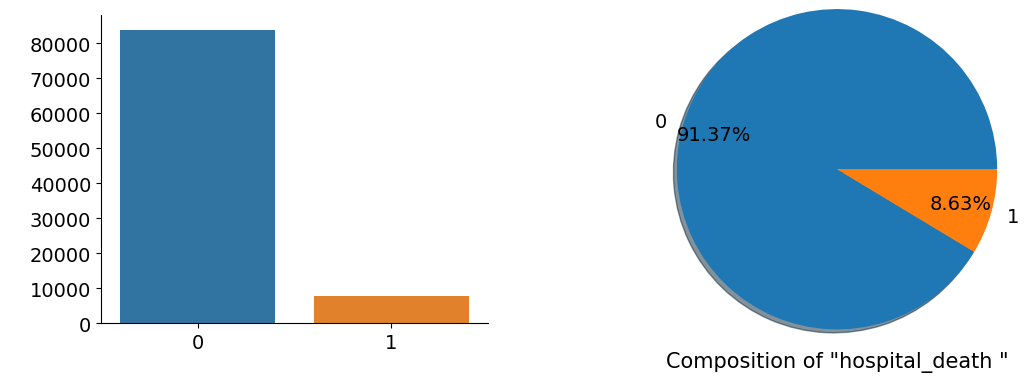

In [9]:
# Visualize the above 
plt.figure(figsize=(12,4))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=data["hospital_death"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(data["hospital_death"].value_counts(),
        labels=list(data["hospital_death"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "hospital_death "', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

## Observation:

* The Target feature `hospital_death` is highly imbalanced.

In [10]:
## Check for any duplicate values

data.duplicated().sum()

0

There are no duplicated records in the dataset.

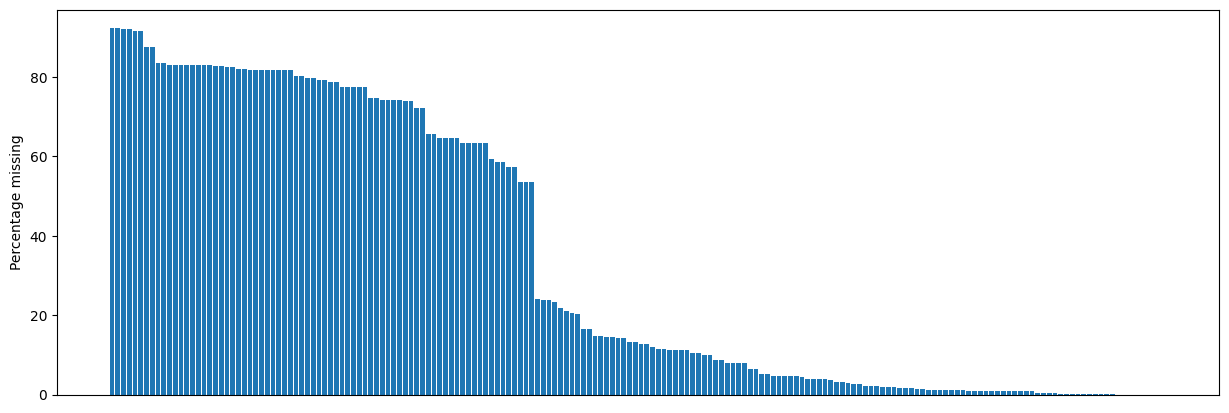

In [11]:
## Checking the % of missing values 

# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = data.isna().sum().div(data.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

## Observation:

* We can see there are records where missing values are more than 60%, in such cases it is better to drop those feature

In [12]:
## Dropping columns which has more than 60% of missing values

dropcols = missing[missing[0]>60]
dropcols

,0
h1_bilirubin_min,92.265001
h1_bilirubin_max,92.265001
h1_lactate_min,91.992411
h1_lactate_max,91.992411
h1_albumin_min,91.398166
h1_albumin_max,91.398166
h1_pao2fio2ratio_min,87.441257
h1_pao2fio2ratio_max,87.441257
h1_arterial_ph_max,83.329517
h1_arterial_ph_min,83.329517


In [13]:
print(f"How many columns to drop ?: ", len(dropcols))

How many columns to drop ?:  66


In [14]:
data.drop(list(dropcols.index), axis=1, inplace=True)

In [15]:
## Lets check the shape

data.shape

(91713, 118)

In [16]:
df = data.copy(deep=True)

df.shape

(91713, 118)

In [17]:
# Summary of Datasets
def summary(df):
    data=pd.DataFrame(index=df.columns)
    data['dtypes']=df.dtypes
    data['count']=df.count()
    data['#unique']=df.nunique()
    data['#missing']=df.isna().sum()
    data['missing%']=df.isna().sum()/len(df)*100
    data=pd.concat([data,df.describe().T.drop('count',axis=1)],axis=1)
    return data

In [18]:
summary(df).style.background_gradient(cmap='YlGnBu')

,dtypes,count,#unique,#missing,missing%,mean,std,min,25%,50%,75%,max
patient_id,int64,91713,91713,0,0.000000,65537.131464,37811.252183,1.000000,32830.000000,65413.000000,98298.000000,131051.000000
hospital_death,int64,91713,2,0,0.000000,0.086302,0.280811,0.000000,0.000000,0.000000,0.000000,1.000000
age,float64,87485,74,4228,4.610033,62.309516,16.775119,16.000000,52.000000,65.000000,75.000000,89.000000
bmi,float64,88284,34888,3429,3.738837,29.185818,8.275142,14.844926,23.641975,27.654655,32.930206,67.814990
elective_surgery,int64,91713,2,0,0.000000,0.183736,0.387271,0.000000,0.000000,0.000000,0.000000,1.000000
ethnicity,object,90318,6,1395,1.521049,nan,nan,nan,nan,nan,nan,nan
gender,object,91688,2,25,0.027259,nan,nan,nan,nan,nan,nan,nan
height,float64,90379,401,1334,1.454538,169.641588,10.795378,137.200000,162.500000,170.100000,177.800000,195.590000
hospital_admit_source,object,70304,15,21409,23.343474,nan,nan,nan,nan,nan,nan,nan
icu_admit_source,object,91601,5,112,0.122120,nan,nan,nan,nan,nan,nan,nan


In [19]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in patient_id:
[ 25312  59342  50777 ...  58179 120598  53612] 

Unique value in hospital_death:
[0 1] 

Unique value in age:
[68. 77. 25. 81. 19. 67. 59. 70. 45. 50. 72. 80. 48. 65. 78. 30. 46. 39.
 79. 58. 87. 60. 85. nan 76. 53. 71. 82. 52. 75. 64. 55. 73. 88. 84. 62.
 56. 38. 41. 35. 54. 74. 49. 86. 51. 63. 61. 47. 33. 89. 36. 69. 57. 22.
 83. 66. 42. 27. 18. 17. 37. 43. 28. 40. 20. 32. 34. 23. 44. 24. 26. 31.
 29. 21. 16.] 

Unique value in bmi:
[22.73       27.42       31.95       ... 33.81054776 45.93520298
 47.17967094] 

Unique value in elective_surgery:
[0 1] 

Unique value in ethnicity:
['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown'] 

Unique value in gender:
['M' 'F' nan] 

Unique value in height:
[180.3  160.   172.7  165.1  188.   190.5  165.   170.2  175.3  154.9
 193.   167.6  177.8  162.6  152.4  149.9  182.9  162.5  151.8  157.5
 185.4  161.3  167.5  166.4     nan 157.4  170.   183.   195.59 182.8
 154.3  175.2  

In [20]:
df.head()

,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,25312,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,NaN,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,59342,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,NaN,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,145.0,143.0,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,50777,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0.0,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,37.0,NaN,36.7,NaN,0.0,NaN,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,46918,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0.0,NaN,NaN,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,4.0,NaN,34.8,NaN,1.0,8.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0

In [21]:
df.shape

(91713, 118)

In [22]:
def check_multicollinearity(df, threshold=0.7):
    df = pd.DataFrame(df)  # Convert dataset to a DataFrame if needed
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]
    corr_matrix = df_numeric.corr().abs()  # Calculate the correlation matrix
    cols = corr_matrix.columns
    multicollinear_features = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if corr_matrix.iloc[i, j] >= threshold:
                multicollinear_features.add(cols[i])
                multicollinear_features.add(cols[j])

    # Plotting the correlation heatmap
    plt.figure(figsize=(12,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    return multicollinear_features

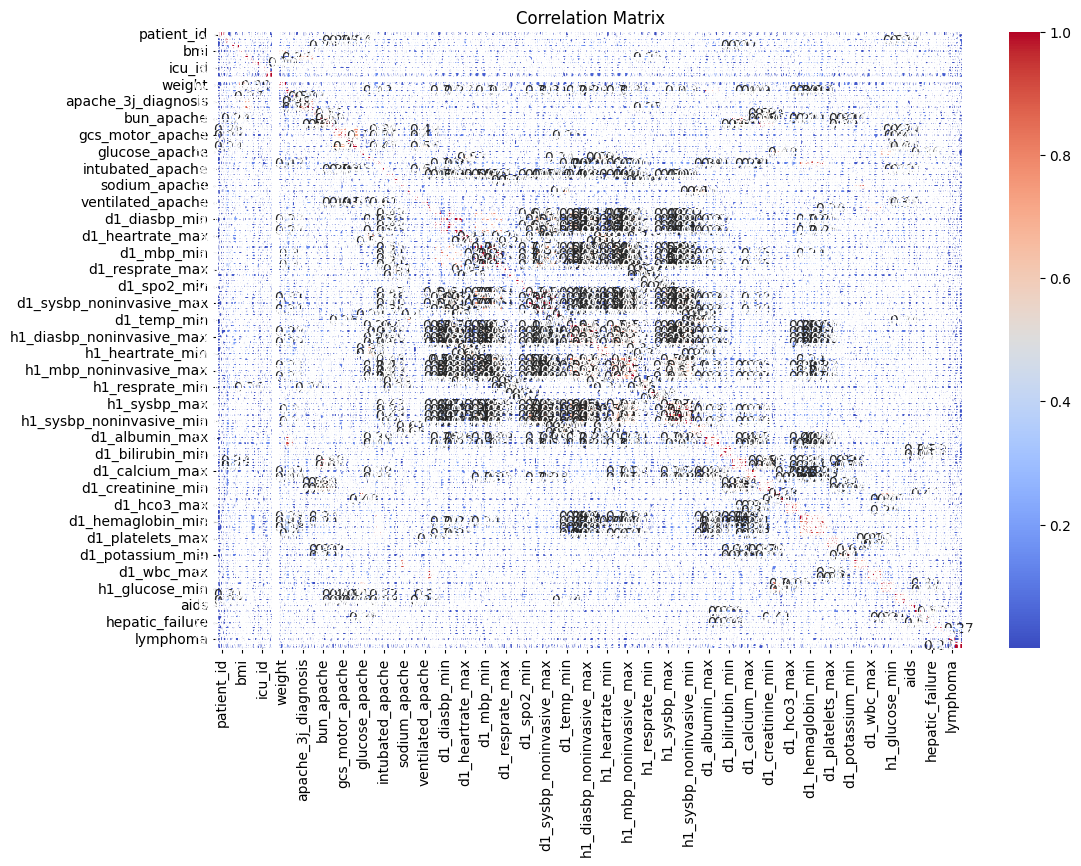

-----------------------------------------------
Multicollinear columns: {'bmi', 'd1_sysbp_min', 'bun_apache', 'd1_bilirubin_max', 'h1_heartrate_min', 'd1_platelets_min', 'apache_3j_diagnosis', 'creatinine_apache', 'h1_mbp_max', 'weight', 'apache_4a_hospital_death_prob', 'd1_hemaglobin_min', 'h1_mbp_noninvasive_max', 'gcs_motor_apache', 'd1_albumin_max', 'h1_temp_min', 'albumin_apache', 'd1_platelets_max', 'h1_mbp_min', 'apache_4a_icu_death_prob', 'd1_glucose_max', 'd1_wbc_max', 'd1_bilirubin_min', 'd1_sysbp_noninvasive_min', 'h1_heartrate_max', 'wbc_apache', 'h1_diasbp_max', 'd1_sodium_max', 'd1_temp_min', 'h1_glucose_min', 'h1_temp_max', 'd1_mbp_noninvasive_max', 'd1_sodium_min', 'gcs_eyes_apache', 'h1_sysbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'd1_wbc_min', 'd1_diasbp_noninvasive_max', 'apache_post_operative', 'd1_creatinine_max', 'glucose_apache', 'h1_sysbp_noninvasive_min', 'd1_calcium_max', 'd1_bun_max', 'd1_hematocrit_min', 'd1_hemaglobin_max', 'd1_mbp_min', 'd1_sysbp_max'

In [23]:
multicollinear_cols = check_multicollinearity(df)

print("-----------------------------------------------")

print("Multicollinear columns:", multicollinear_cols)

In [24]:
len(multicollinear_cols)

74

In [25]:
df.shape

(91713, 118)

In [26]:
df.drop(multicollinear_cols, axis=1, inplace=True)

In [27]:
df.shape

(91713, 44)

In [28]:
df.head()

,patient_id,hospital_death,age,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,apache_2_diagnosis,arf_apache,gcs_unable_apache,intubated_apache,map_apache,resprate_apache,urineoutput_apache,ventilated_apache,d1_heartrate_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_temp_max,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,d1_glucose_min,d1_potassium_max,d1_potassium_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,25312,0,68.0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,113.0,0.0,0.0,0.0,40.0,36.0,NaN,0.0,72.0,34.0,10.0,100.0,74.0,39.9,26.0,18.0,100.0,74.0,109.0,4.0,3.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,59342,0,77.0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,108.0,0.0,0.0,0.0,46.0,33.0,NaN,1.0,72.0,32.0,12.0,100.0,70.0,36.3,31.0,28.0,95.0,70.0,128.0,4.2,3.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,50777,0,25.0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,122.0,0.0,0.0,0.0,68.0,37.0,NaN,0.0,68.0,21.0,8.0,98.0,91.0,37.0,20.0,16.0,98.0,91.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,46918,0,81.0,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,203.0,0.0,0.0,1.0,60.0,4.0,NaN,1.0,92.0,23.0,7.0,100.0,95.0,38.0,12.0,11.0,100.0,99.0,88.0,5.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,34377,0,19.0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,119.0,0.0,NaN,0.0,103.0,16.0,NaN,0.0,60.0,18.0,16.0,100.0,96.0,37.2,NaN,NaN,100.0,100.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [29]:
df.isnull().sum()

patient_id                         0
hospital_death                     0
age                             4228
ethnicity                       1395
gender                            25
height                          1334
hospital_admit_source          21409
icu_admit_source                 112
icu_id                             0
icu_stay_type                      0
icu_type                           0
pre_icu_los_days                   0
readmission_status                 0
apache_2_diagnosis              1662
arf_apache                       715
gcs_unable_apache               1037
intubated_apache                 715
map_apache                       994
resprate_apache                 1234
urineoutput_apache             48998
ventilated_apache                715
d1_heartrate_min                 145
d1_resprate_max                  385
d1_resprate_min                  385
d1_spo2_max                      333
d1_spo2_min                      333
d1_temp_max                     2324
h

## Fill the missing values for categorical and numerical features

In [30]:
## Impute the categorical columns

impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)
    
    
## Impute for numerical columns

impute_num_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_num_cols:
    mode = df[feat].median()[0]
    df[feat].fillna(median, inplace=True)

In [31]:
df.isnull().sum()

patient_id                     0
hospital_death                 0
age                            0
ethnicity                      0
gender                         0
height                         0
hospital_admit_source          0
icu_admit_source               0
icu_id                         0
icu_stay_type                  0
icu_type                       0
pre_icu_los_days               0
readmission_status             0
apache_2_diagnosis             0
arf_apache                     0
gcs_unable_apache              0
intubated_apache               0
map_apache                     0
resprate_apache                0
urineoutput_apache             0
ventilated_apache              0
d1_heartrate_min               0
d1_resprate_max                0
d1_resprate_min                0
d1_spo2_max                    0
d1_spo2_min                    0
d1_temp_max                    0
h1_resprate_max                0
h1_resprate_min                0
h1_spo2_max                    0
h1_spo2_mi

In [32]:
df.shape

(91713, 44)

In [33]:
df.head(3)

,patient_id,hospital_death,age,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,apache_2_diagnosis,arf_apache,gcs_unable_apache,intubated_apache,map_apache,resprate_apache,urineoutput_apache,ventilated_apache,d1_heartrate_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_temp_max,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,d1_glucose_min,d1_potassium_max,d1_potassium_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,25312,0,68.0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,113.0,0.0,0.0,0.0,40.0,36.0,0.0,0.0,72.0,34.0,10.0,100.0,74.0,39.9,26.0,18.0,100.0,74.0,109.0,4.0,3.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,59342,0,77.0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,108.0,0.0,0.0,0.0,46.0,33.0,0.0,1.0,72.0,32.0,12.0,100.0,70.0,36.3,31.0,28.0,95.0,70.0,128.0,4.2,3.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,50777,0,25.0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,122.0,0.0,0.0,0.0,68.0,37.0,0.0,0.0,68.0,21.0,8.0,98.0,91.0,37.0,20.0,16.0,98.0,91.0,97.0,4.0,3.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic


## Define independent and dependent features

In [34]:
X = df.drop(columns=["hospital_death"], axis=1)
y = df["hospital_death"]

## Define numerical and categorical features

In [35]:
numerical_features = X.select_dtypes(exclude="object").columns

numerical_features

Index(['patient_id', 'age', 'height', 'icu_id', 'pre_icu_los_days',
       'readmission_status', 'apache_2_diagnosis', 'arf_apache',
       'gcs_unable_apache', 'intubated_apache', 'map_apache',
       'resprate_apache', 'urineoutput_apache', 'ventilated_apache',
       'd1_heartrate_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max',
       'd1_spo2_min', 'd1_temp_max', 'h1_resprate_max', 'h1_resprate_min',
       'h1_spo2_max', 'h1_spo2_min', 'd1_glucose_min', 'd1_potassium_max',
       'd1_potassium_min', 'aids', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object')

In [36]:
categorical_features = X.select_dtypes(include="object").columns

categorical_features

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [37]:
X["ethnicity"].value_counts()

ethnicity
Caucasian           72079
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: count, dtype: int64

In [38]:
X["hospital_admit_source"].value_counts()

hospital_admit_source
Emergency Department    58371
Operating Room           9787
Floor                    8055
Direct Admit             6441
Recovery Room            2896
Acute Care/Floor         1910
Other Hospital           1641
Step-Down Unit (SDU)     1131
PACU                     1017
Other ICU                 233
Chest Pain Center         134
ICU to SDU                 45
ICU                        35
Observation                10
Other                       7
Name: count, dtype: int64

In [39]:
X["icu_admit_source"].value_counts()

icu_admit_source
Accident & Emergency         54172
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: count, dtype: int64

In [40]:
X["apache_3j_bodysystem"].value_counts()

apache_3j_bodysystem
Cardiovascular          31661
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: count, dtype: int64

## Encoding and scaling the features through Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder

## Define the pipeline

num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder", OrdinalEncoder()),
    ]
)

In [42]:
## encode and cale the features

from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("OrdinalEncoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features),
    ("RobustScaler", RobustScaler(), numerical_features)
], remainder="passthrough")

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train = transformer.fit_transform(X_train)

In [45]:
X_test = transformer.transform(X_test)

In [46]:
X_train.shape, X_test.shape

((73370, 43), (18343, 43))

## Handling the Imbalanced Target feature

In [47]:
# upsampling using smote

from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 0, n=67042 (91.38%)
Class= 1, n=6328 (8.62%)
Class= 0, n=67042 (50.00%)
Class= 1, n=67042 (50.00%)
Upsampled data shape:  (134084, 43) (134084,)


In [48]:
from collections import Counter

# Assuming 'y' is your target variable
class_distribution = Counter(y_train)

# Print the class distribution
for class_label, count in class_distribution.items():
    print(f"Class {class_label}: {count} samples")

# Check if 'y' is balanced
is_balanced = all(count == class_distribution[y_train[0]] for count in class_distribution.values())

if is_balanced:
    print("The target variable 'y' is balanced.")
else:
    print("The target variable 'y' is imbalanced.")


Class 0: 67042 samples
Class 1: 67042 samples
The target variable 'y' is balanced.


In [49]:
from sklearn.metrics import accuracy_score, f1_score

In [50]:
def evaluate_model(true, predicted):
    score_f1 = f1_score(true, predicted, average="weighted")
    accuracy = accuracy_score(true, predicted)

    return score_f1, accuracy

In [51]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

def fit_classification_models(X, y, test_size=0.2, random_state=42):
    """
    Fit classification models using XGBoost, RandomForest, and ExtraTrees classifiers.

    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The input data.

    y : array-like of shape (n_samples,)
        The target variable.

    test_size : float, default=0.2
        The proportion of the dataset to include in the test split.

    random_state : int, default=42
        Controls the randomness of the dataset splitting.

    Returns:
    --------
    results : dict
        A dictionary containing the performance metrics for XGBoost, RandomForest, and ExtraTrees classifiers.
    """
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create pipelines for XGBoost, RandomForest, and ExtraTrees classifiers
    pipelines = {
        'XGBoost': Pipeline([('scaler', RobustScaler()), ('classifier', XGBClassifier())]),
        'Random Forest': Pipeline([('scaler', RobustScaler()), ('classifier', RandomForestClassifier())]),
        'ExtraTreesClassifier': Pipeline([('scaler', RobustScaler()), ('classifier', ExtraTreesClassifier())]),
    }

    # Fit and evaluate XGBoost, RandomForest, and ExtraTrees classifiers
    results = {}

    for classifier_name, pipeline in pipelines.items():
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")
        results[classifier_name] = {'accuracy': accuracy, 'f1-score': f1}

    return results

In [52]:
results = fit_classification_models(X_train, y_train)

In [53]:
# Create a DataFrame from the results
df = pd.DataFrame(results).transpose()

# Sort the DataFrame by the F1-score in descending order
df_sorted = df.sort_values(by='f1-score', ascending=False)

# Display the sorted DataFrame
df_sorted

,accuracy,f1-score
ExtraTreesClassifier,0.979938,0.979938
Random Forest,0.963419,0.963410
XGBoost,0.958310,0.958281


In [54]:
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)
y_pred = extratree.predict(X_test)

In [55]:
top_feat_importances = print(extratree.feature_importances_)

[0.01250993 0.0435739  0.01734907 0.02638766 0.00788052 0.01851657
 0.02676374 0.0257374  0.01818439 0.04392877 0.0159874  0.02401294
 0.01738794 0.         0.05063409 0.00743308 0.00344641 0.06276606
 0.02208569 0.02693178 0.02533867 0.17696697 0.02077994 0.02081306
 0.01677225 0.01247216 0.03202429 0.02161523 0.02145182 0.01893123
 0.01499344 0.016985   0.01636302 0.01953172 0.01773026 0.00039388
 0.00524486 0.04372392 0.00492952 0.00823904 0.00218535 0.00154649
 0.00945051]


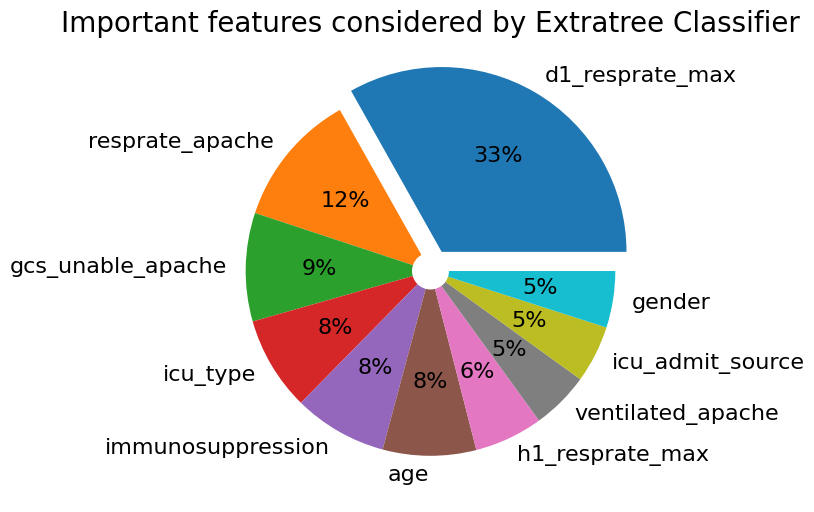

In [56]:
feat_importances = pd.Series(extratree.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extratree Classifier',fontsize=20)
plt.show()

## We will create our ANN Model with these Top Features

In [57]:
selected_columns = ['icu_type', 'immunosuppression', 'h1_resprate_max', 'icu_admit_source', 'ventilated_apache', 'icu_id', 'd1_resprate_max', 
                   'resprate_apache', 'gcs_unable_apache', 'age', 'hospital_death']

In [58]:
len(selected_columns)

11

In [59]:
selected_columns

['icu_type',
 'immunosuppression',
 'h1_resprate_max',
 'icu_admit_source',
 'ventilated_apache',
 'icu_id',
 'd1_resprate_max',
 'resprate_apache',
 'gcs_unable_apache',
 'age',
 'hospital_death']